In [137]:
from google.colab import files
files.upload()

In [2]:
import re
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('Train.csv')

In [4]:
display(data.shape)
data.head()

(13320, 9)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
#Dont think availability will have any impact on the price of a house so Dropping the column availabitity
data.drop(labels=['availability'],axis = 1,inplace = True)
data['balcony'] = data['balcony'].fillna(0)

In [8]:
data.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
data['size'] = data['size'].fillna('0 BHK')

In [10]:
size = []
for _,val in enumerate(data['size']):
  size.append(int(val.split()[0]))
data['size'] = np.array(size)
data['size'].replace(0,np.median(data['size']))

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13320, dtype: int64

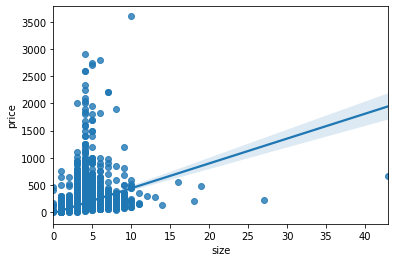

In [11]:
sns.regplot(x = data['size'],y = data['price'] ,scatter=True)

In [12]:
#size has no great on price linearly
area = []
for _,val in enumerate(data['total_sqft']):
  area_arr = list(map(float,re.findall(r'\d+(?:\.\d+)?',val)))
  if len(area_arr) > 0:
    area.append(np.mean(area_arr))
  else:area.append(area_arr[0])

data['total_sqft'] = np.array(area)

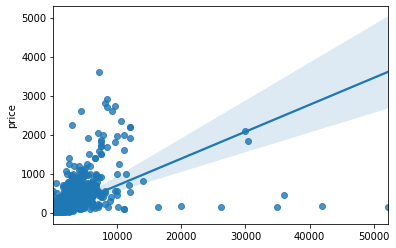

In [13]:
sns.regplot(x = area,y = data['price'] ,scatter=True)

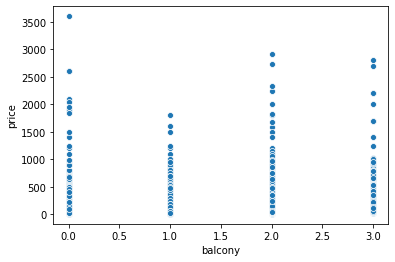

In [14]:
sns.scatterplot(x = data['balcony'],y = data['price'])

In [15]:
#the more the balcony the more the range of price

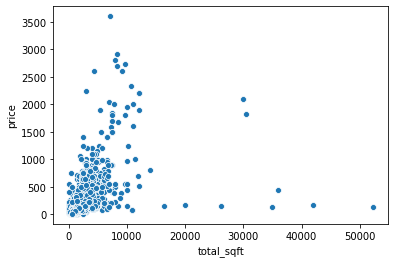

In [16]:
sns.scatterplot(x = data['total_sqft'],y = data['price'])

In [17]:
display(data['area_type'].nunique())
display(data['society'].nunique())
display(data['location'].nunique())

4

2688

1305

In [18]:
data = pd.concat([pd.get_dummies(data=data['area_type'],drop_first = True),data],axis = 1,)
data.drop(labels= ['area_type'],axis = 1,inplace= True)

In [19]:
dict_society = Counter(data['society'])
dict_location = Counter(data['location'])

In [20]:
for idx,val in enumerate(data['society']):
  data['society'][idx] = dict_society[val]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
data['society'].notnull().sum()

13320

In [22]:
data['location'].fillna(0)

for idx,val in enumerate(data['location']):
  data['location'][idx] = dict_location[val]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Carpet  Area          13320 non-null  uint8  
 1   Plot  Area            13320 non-null  uint8  
 2   Super built-up  Area  13320 non-null  uint8  
 3   location              13320 non-null  object 
 4   size                  13320 non-null  int64  
 5   society               13320 non-null  object 
 6   total_sqft            13320 non-null  float64
 7   bath                  13247 non-null  float64
 8   balcony               13320 non-null  float64
 9   price                 13320 non-null  float64
dtypes: float64(4), int64(1), object(2), uint8(3)
memory usage: 767.6+ KB


In [32]:
data['bath'].fillna(np.mean(data['bath']),inplace = True)

In [90]:
X = data.iloc[:,0:9].values
Y = data.iloc[:,9:10].values

In [91]:
#Preprocessing version 1 completed

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

linear_regressor = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state = 0)
random_forest = RandomForestRegressor(n_estimators = 200,random_state = 0,n_jobs=2,min_samples_split=6)

X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size = 0.2)
linear_regressor.fit(X_train,Y_train)
prediction = linear_regressor.predict(X_val)

In [133]:
print('Linear Regression Model',mean_absolute_error(Y_val,prediction))
decision_tree.fit(X_train,Y_train)
tree_prediction = decision_tree.predict(X_val)
print('Decision Tree Regression',mean_absolute_error(Y_val,tree_prediction))
#Seems Random Forest Will perform better than above

Linear Regression Model 42.747231739583505
Decision Tree Regression 43.89607734132734


In [128]:
random_forest.fit(X_train,Y_train)
forest_prediction = random_forest.predict(X_val)
print(np.sqrt(np.square(np.log10(forest_prediction +1) - np.log10(Y_val +1)).mean()))#Actual score criteria

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.4282279339228236


In [136]:
test_data = pd.read_csv('Test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1478 non-null   object 
 4   society       854 non-null    object 
 5   total_sqft    1480 non-null   object 
 6   bath          1473 non-null   float64
 7   balcony       1411 non-null   float64
 8   price         0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 104.2+ KB


In [123]:
test_data.drop(labels=['availability'],axis = 1,inplace = True)
test_data['balcony'] = test_data['balcony'].fillna(0)

test_data['size'] = test_data['size'].fillna('0 BHK')

size = []
for _,val in enumerate(test_data['size']):
  size.append(int(val.split()[0]))
test_data['size'] = np.array(size)
test_data['size'].replace(0,np.median(test_data['size']))

area = []
for _,val in enumerate(test_data['total_sqft']):
  area_arr = list(map(float,re.findall(r'\d+(?:\.\d+)?',val)))
  if len(area_arr) > 0:
    area.append(np.mean(area_arr))
  else:area.append(area_arr[0])

test_data['total_sqft'] = np.array(area)


test_data = pd.concat([pd.get_dummies(data=test_data['area_type'],drop_first = True),test_data],axis = 1)
test_data.drop(labels= ['area_type'],axis = 1,inplace= True)

dict_society = Counter(test_data['society'])
dict_location = Counter(test_data['location'])


for idx,val in enumerate(test_data['society']):
  test_data['society'][idx] = dict_society[val]

test_data['location'].fillna(0)

for idx,val in enumerate(test_data['location']):
  test_data['location'][idx] = dict_location[val]

test_data['bath'].fillna(np.mean(test_data['bath']),inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [124]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Carpet  Area          1480 non-null   uint8  
 1   Plot  Area            1480 non-null   uint8  
 2   Super built-up  Area  1480 non-null   uint8  
 3   location              1480 non-null   object 
 4   size                  1480 non-null   int64  
 5   society               1480 non-null   object 
 6   total_sqft            1480 non-null   float64
 7   bath                  1480 non-null   float64
 8   balcony               1480 non-null   float64
 9   price                 0 non-null      float64
dtypes: float64(4), int64(1), object(2), uint8(3)
memory usage: 85.4+ KB


In [125]:
model = random_forest = RandomForestRegressor(n_estimators = 200,random_state = 0,n_jobs=2,min_samples_split=6)
model.fit(X,Y)
test_submit = test_data.iloc[:,0:9].values
predictions = model.predict(test_submit)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [130]:
output = pd.DataFrame({'price':predictions})
output.to_csv('submission.csv', index=False)

In [132]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>